In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Supervised Learning Part 2a -- Classification

To visualize the workings of machine learning algorithms, it is often helpful to study two-dimensional or one-dimensional data, that is data with only one or two features. While in practice, datasets usually have many more features, it is hard to plot high-dimensional data on two-dimensional screens.

We will illustrate some very simple examples before we move on to more "real world" data sets.

First, we will look at a two class classification problem in two dimensions. We use the synthetic data generated by the ``make_blobs`` function.

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0)

print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)

print('\nFirst 5 samples:\n', X[:5, :])
print('\nFirst 5 labels:', y[:5])

X ~ n_samples x n_features: (100, 2)
y ~ n_samples: (100,)

First 5 samples:
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]

First 5 labels: [1 1 0 0 1]


As the data is two-dimensional, we can plot each sample as a point in a two-dimensional coordinate system, with the first feature being the x-axis and the second feature being the y-axis.

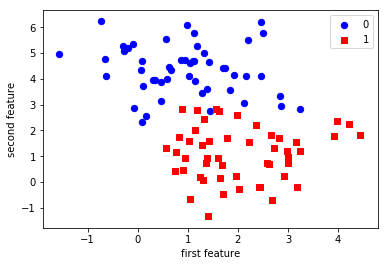

In [3]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');

Again we need to split the data into training and test sets.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)


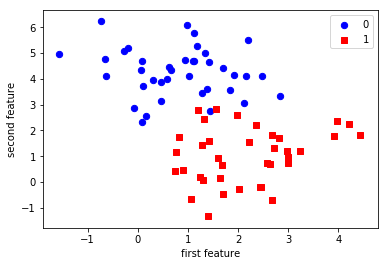

In [16]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');

We import the `LogisticRegression` class and instatiate a new object.

In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

To built the model from our data, that is to learn how to classify new points, we call the ``fit`` function with the training data, and the corresponding training labels (the desired output for the training data point):

**NOTE: You may get a warning about the default solver, this can safely be ignored.**

In [6]:
classifier.fit(X_train, y_train)

C:\Program\anaconda3\envs\mltutorials\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

We can then apply the model to unseen data and use the model to predict the estimated outcome using the ``predict`` method:

In [7]:
prediction = classifier.predict(X_test)

We can compare these against the true labels:

In [8]:
print(prediction)
print(y_test)

[1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0]
[1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0]


We can evaluate our classifier quantitatively by measuring what fraction of predictions is correct. This is called **accuracy**:

In [9]:
np.mean(prediction == y_test)

0.84

Again, scikit-learn provides an easy way to evaluate the prediction quantitatively using the ``score`` method.     

In [10]:
classifier.score(X_test, y_test)

0.84

It is often helpful to compare the generalization performance (on the test set) to the performance on the training set:

In [11]:
classifier.score(X_train, y_train)

0.9466666666666667

LogisticRegression is a so-called linear model,
that means it will create a decision that is linear in the input space. In 2d, this simply means it finds a line to separate the blue from the red:

In [12]:
def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None):
    if eps is None:
        eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, colors=['blue', 'red'])
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


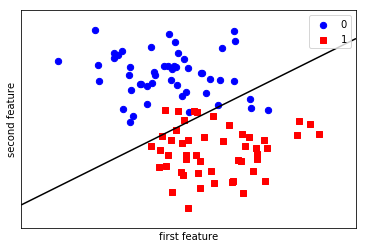

In [13]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(classifier, X)
plt.legend(loc='upper right');

**Estimated parameters**: All the estimated model parameters are attributes of the estimator object ending by an underscore. Here, these are the coefficients and the offset of the line:

In [14]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 1.38092515 -1.49993172]]
[1.54995538]


___
## Exercise
The example above was a very simple example with only two features. Logistic regression can work for data with a lot more dimensions as well. We will now create a classifier that can predict whether a breast cancer tumour is malignant or benign.

Use the breast cancer data and create a logistic regression classifier.

You can look at the simple example above for guidance.

**NOTE: The plot_2d_separator will not work with this dataset!**

In [18]:
from sklearn.datasets import load_breast_cancer
bc_data = load_breast_cancer()
print(bc_data.DESCR)

X, y = bc_data.data, bc_data.target

# We need to:
# Split the data into training and test sets
# Create a LogisticRegression object
# Fit the regressor object to the training data
# Evaluate the model on the test data

# ...

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

C:\Program\anaconda3\envs\mltutorials\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9440559440559441

___

## Another classifier: K Nearest Neighbors
Another popular and easy to understand classifier is K nearest neighbors (kNN).  It has one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

In [ ]:
# First reload our synthetic data
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(centers=2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

The interface is exactly the same as for ``LogisticRegression above``.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

This time we set a parameter of the KNeighborsClassifier to tell it we only want to look at one nearest neighbor:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

We fit the model with out training data

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X)
plt.legend(loc='upper right');

In [ ]:
knn.score(X_test, y_test)

Now train a KNN-classifier for the breast cancer dataset.

In [ ]:
from sklearn.datasets import load_breast_cancer
bc_data = load_breast_cancer()
print(bc_data.DESCR)

X, y = bc_data.data, bc_data.target

# We need to:
# Split the data into training and test sets
# Create a KNeighborsClassifier object (how many neighbours do you want to use?)
# Fit the regressor object to the training data
# Evaluate the model on the test data

# ...

___
## Exercise
Apply the KNeighborsClassifier to the ``iris`` dataset. Play with different values of the ``n_neighbors`` and observe how training and test score change.

In [ ]:
# %load solutions/knn_with_diff_k.py

On Google Colab, visit [knn_with_diff_k.py](https://github.com/fordanic/cmiv-ai-course/blob/master/notebooks/solutions/knn_with_diff_k.py) and manually copy the content of the solution and paste to the cell above.

___